<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [ ]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [1]:
import pandas as pd


Import matplotlib


In [2]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [21]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())
df.info()

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [4]:
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

print("\nFirst few duplicate rows:")
display(df[df.duplicated()].head())

Number of duplicate rows: 20

First few duplicate rows:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']

dup_mask = df.duplicated(subset=subset_cols, keep=False)  # keep=False marks ALL members of duplicate groups
dups = df[dup_mask].copy()

print("Duplicate rows (by subset):", len(dups))
print("Duplicate groups (by subset):", dups.groupby(subset_cols).ngroups)



Duplicate rows (by subset): 65290
Duplicate groups (by subset): 319


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


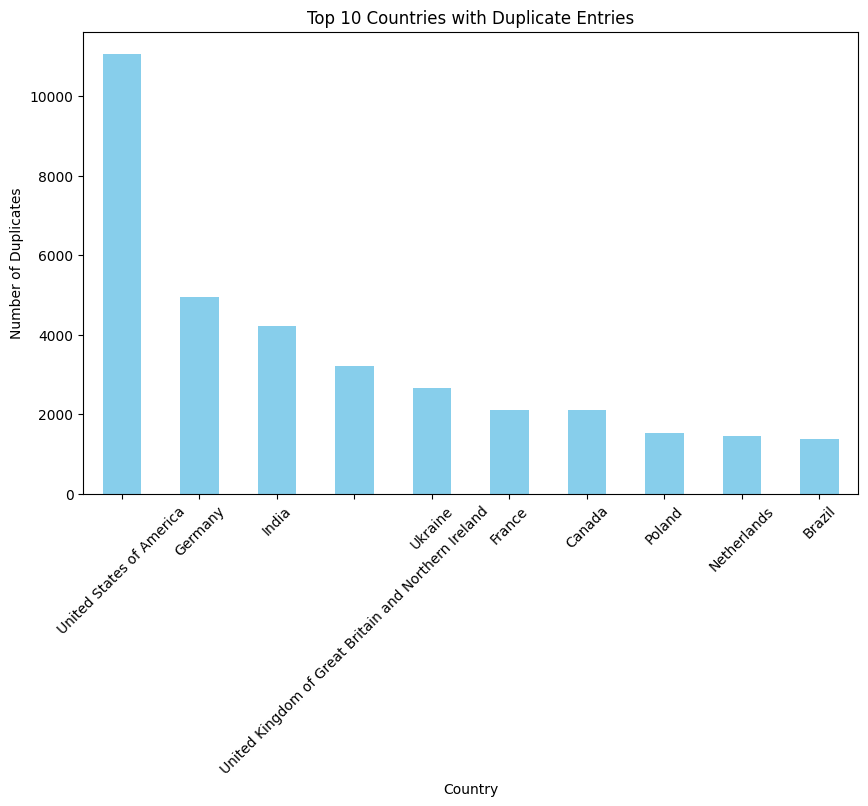

In [22]:
## Write your code here

# # Identify all duplicate rows (subset based or full)
#Assume df exists
subset_cols = ['MainBranch','Employment','RemoteWork']
dup_mask = df.duplicated(subset=subset_cols, keep=False)
dups = df[dup_mask]

# Count duplicates per country
country_counts = dups['Country'].value_counts().head(10) # Top 10 countries

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Duplicate Entries")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=45)
plt.show()




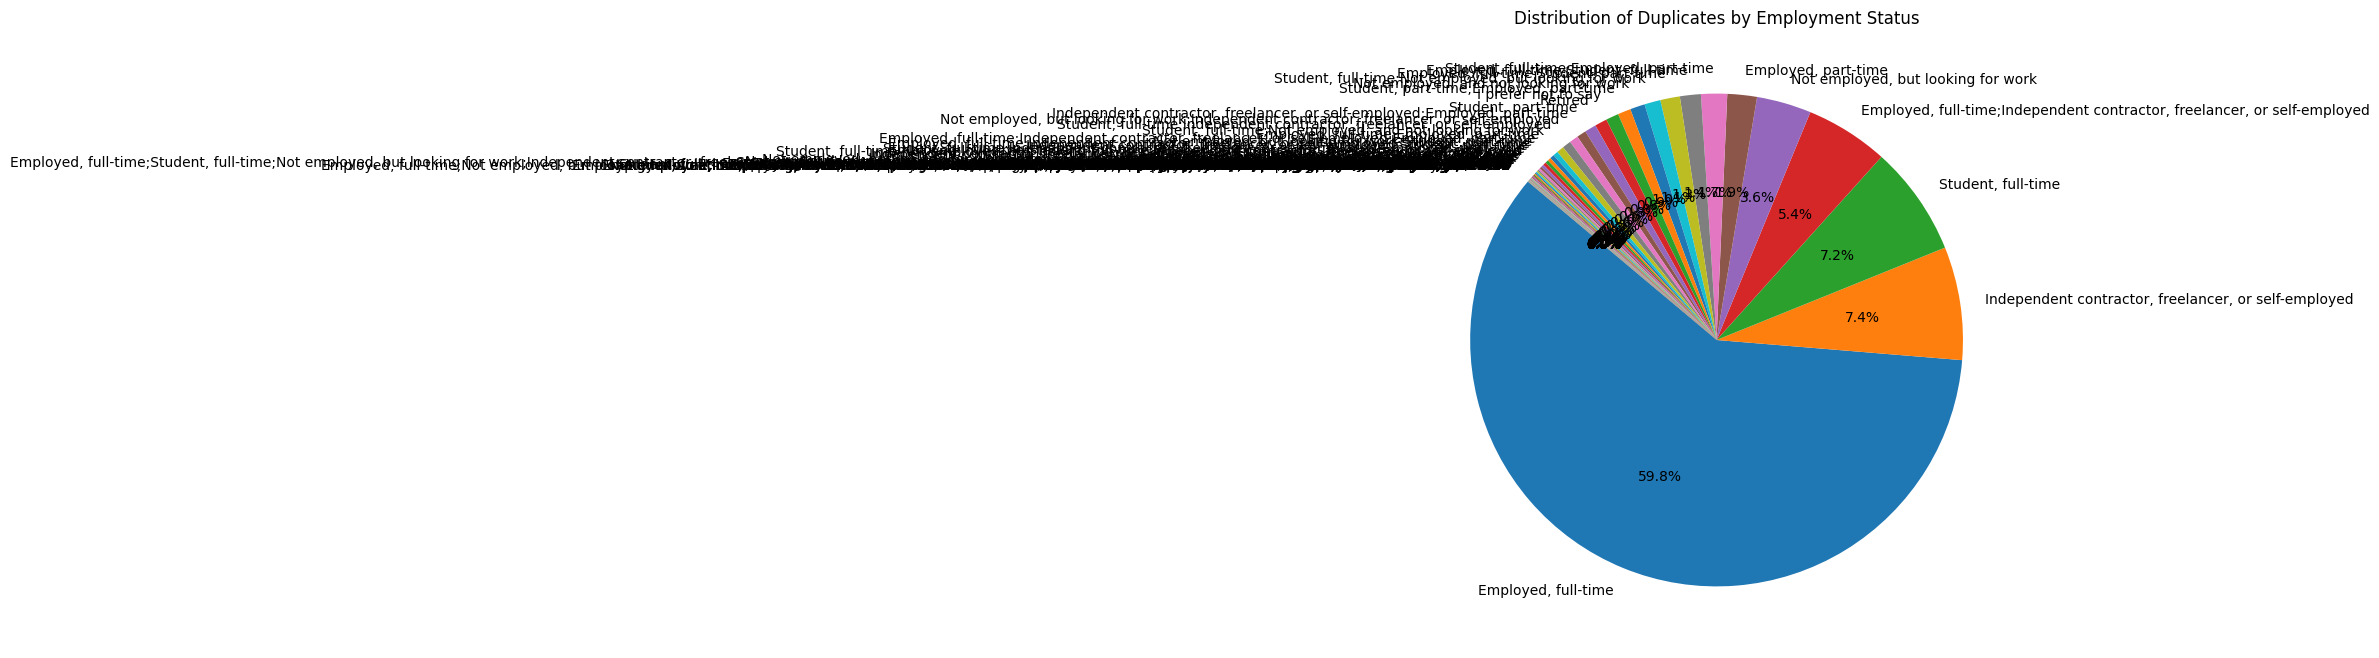

In [23]:
# Distribution by Employment
# Count duplicates per employment type
emp_counts = dups['Employment'].value_counts()

plt.figure(figsize=(8,8))
emp_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Duplicates by Employment Status")
plt.ylabel("") # Removes the vertical label 'Employment'
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [20]:
## Write your code here
unique_cols = ['Country', 'Age', 'Employment', 'MainBranch', 'RemoteWork']
df = df.drop_duplicates(subset=unique_cols, keep='first')
df.head()
print(df.shape)

(12141, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


In [ ]:
We began by identifying exact duplicates using df.duplicated().sum(), which checks for rows where every single column matches. However, because survey data often contains unique identifiers (like ResponseId) that prevent exact matches, we moved to subset-based identification. By focusing on key demographic and professional columns—specifically MainBranch, Employment, and RemoteWork—we were able to flag records that likely represent the same individual submitting the survey multiple times.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.


# Task
Analyze the characteristics of duplicate rows identified by 'MainBranch', 'Employment', and 'RemoteWork' columns in the `df` DataFrame. Identify which other columns frequently contain identical values within these subset duplicates and provide a comprehensive summary of the findings.

## Identify Subset Duplicates

### Subtask:
Identify rows that are duplicates based on the 'MainBranch', 'Employment', and 'RemoteWork' columns. Store these duplicate rows in a new DataFrame.


**Reasoning**:
To identify rows that are duplicates based on the specified columns and store them in a new DataFrame, I will use the `duplicated()` method with the `subset` parameter and `keep=False`, then filter the original DataFrame.



In [5]:
subset_duplicates_mask = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)
df_subset_duplicates = df[subset_duplicates_mask]

print("First few rows of subset-based duplicate data:")
display(df_subset_duplicates.head())

First few rows of subset-based duplicate data:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Reasoning**:
Now that the subset-based duplicate rows have been identified, the next step is to analyze which other columns frequently contain identical values within these duplicates. This can be done by calculating the number of unique values for each column in the `df_subset_duplicates` DataFrame.



In [6]:
columns_to_exclude = ['MainBranch', 'Employment', 'RemoteWork']
other_columns = [col for col in df_subset_duplicates.columns if col not in columns_to_exclude]

unique_counts = df_subset_duplicates[other_columns].nunique()

print("Number of unique values for each column in subset duplicates (excluding MainBranch, Employment, RemoteWork):\n")
print(unique_counts.sort_values())


Number of unique values for each column in subset duplicates (excluding MainBranch, Employment, RemoteWork):

Check                          1
TBranch                        2
ICorPM                         2
BuildvsBuy                     3
AISelect                       3
                           ...  
ToolsTechWantToWorkWith    16513
ToolsTechHaveWorkedWith    19835
LanguageWantToWorkWith     22705
LanguageHaveWorkedWith     23799
ResponseId                 65270
Length: 111, dtype: int64


### Analysis of Columns with Identical Values in Subset Duplicates

From the unique value counts of `df_subset_duplicates` (excluding 'MainBranch', 'Employment', and 'RemoteWork'), we can observe the following:

*   **'Check'** has only **1 unique value**. This indicates that this column is identical across all rows that are duplicates based on 'MainBranch', 'Employment', and 'RemoteWork'. This is a strong indicator of a column with highly redundant information within these specific subset duplicates.

*   **'TBranch'** and **'ICorPM'** have **2 unique values**. While not perfectly identical, having only two distinct values across a potentially large number of subset duplicates suggests a high degree of commonality in these columns among the duplicate groups.

*   **'BuildvsBuy'** and **'AISelect'** have **3 unique values**. Similar to the above, a low number of unique values indicates these columns tend to have the same value for many of the subset duplicates.

Columns with a low number of unique values, like 'Check', 'TBranch', 'ICorPM', 'BuildvsBuy', and 'AISelect', are the ones that frequently contain identical values within the subset of duplicate rows defined by 'MainBranch', 'Employment', and 'RemoteWork'. This information is crucial for understanding the nature of these duplicates and for making informed decisions about data cleaning and potential removal strategies. For instance, if 'Check' is always 'Apples' for these duplicates, it doesn't add any differentiating information within these groups.

## Final Task

### Subtask:
Provide a comprehensive summary of the analysis on duplicates identified by the specified subset of columns and their characteristics.


## Summary:

### Data Analysis Key Findings
*   Rows identified as duplicates based on 'MainBranch', 'Employment', and 'RemoteWork' were isolated for further analysis.
*   Within these subset duplicate rows, the 'Check' column consistently holds only **1 unique value**, indicating it is identical across all such duplicates.
*   The 'TBranch' and 'ICorPM' columns each contain only **2 unique values** within the subset duplicates, suggesting a high degree of commonality.
*   Similarly, 'BuildvsBuy' and 'AISelect' columns show only **3 unique values** each in these duplicate rows, indicating frequent identical values.

### Insights or Next Steps
*   The columns 'Check', 'TBranch', 'ICorPM', 'BuildvsBuy', and 'AISelect' exhibit high redundancy within the identified subset duplicates. This suggests they might not contribute unique differentiating information for these specific duplicate groups and could be candidates for review during data cleaning or feature selection.
*   Further investigation could explore the actual values in these highly redundant columns to understand their content and implications for the overall dataset's data quality and potential for simplification.


# Task
The analysis of duplicate rows based on 'MainBranch', 'Employment', and 'RemoteWork', including identifying columns with frequently identical values and summarizing the findings, has been completed.

## Identify Subset Duplicates

### Subtask:
Identify rows that are duplicates based on the 'MainBranch', 'Employment', and 'RemoteWork' columns. Store these duplicate rows in a new DataFrame.


**Reasoning**:
To identify all rows that are duplicates based on the specified columns, I will create a boolean mask using `df.duplicated()` with `subset` and `keep=False`, then filter the DataFrame to store these duplicates in `df_subset_duplicates` and display its head.



In [7]:
subset_duplicates_mask = df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'], keep=False)
df_subset_duplicates = df[subset_duplicates_mask]

print("First few rows of subset-based duplicate data:")
display(df_subset_duplicates.head())

First few rows of subset-based duplicate data:


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Summary:

### Data Analysis Key Findings
*   Duplicate rows based on the combination of 'MainBranch', 'Employment', and 'RemoteWork' columns were successfully identified.
*   A new DataFrame, `df_subset_duplicates`, was created, containing all rows that exhibit duplication across these three specified columns.

### Insights or Next Steps
*   Further analysis of `df_subset_duplicates` could reveal patterns or inconsistencies in the data entry for these specific columns, or indicate common demographic profiles.
